# Using KNN Algorithm to classify if a person is diabetic or not

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
#importing StandardScaler class from preprocessing module of package sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [2]:
# loading the dataset
data = pd.read_csv('diabetes.csv')
# printing the first five entries of the dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
# providing technical information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# generating descriptive statistics about numerical data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
'''Replace columns like [Gluscose,BloodPressure,SkinThickness,BMI,Insulin] with
Zero as values with means of respective columns'''
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
for col in zero_not_accepted:
    data[col]= data[col].replace(0,np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)

In [6]:
# extracting independent variables
X = data.iloc[:,:-1]  #Accessing a group of rows and columns by integer positions
# extracting dependent variable
y = data.iloc[:,-1]                   

<AxesSubplot:>

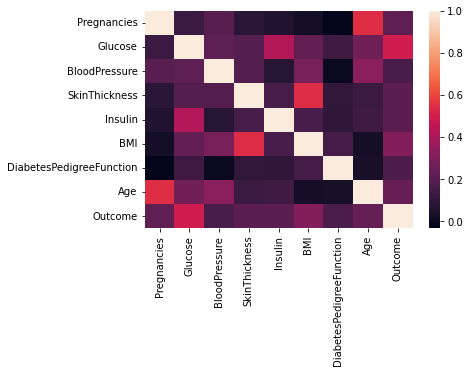

In [7]:
# Exploring data to know relation before processing
#Finding correlation between different variables and plotting it on graph
sns.heatmap(data.corr())

<AxesSubplot:xlabel='Age', ylabel='count'>

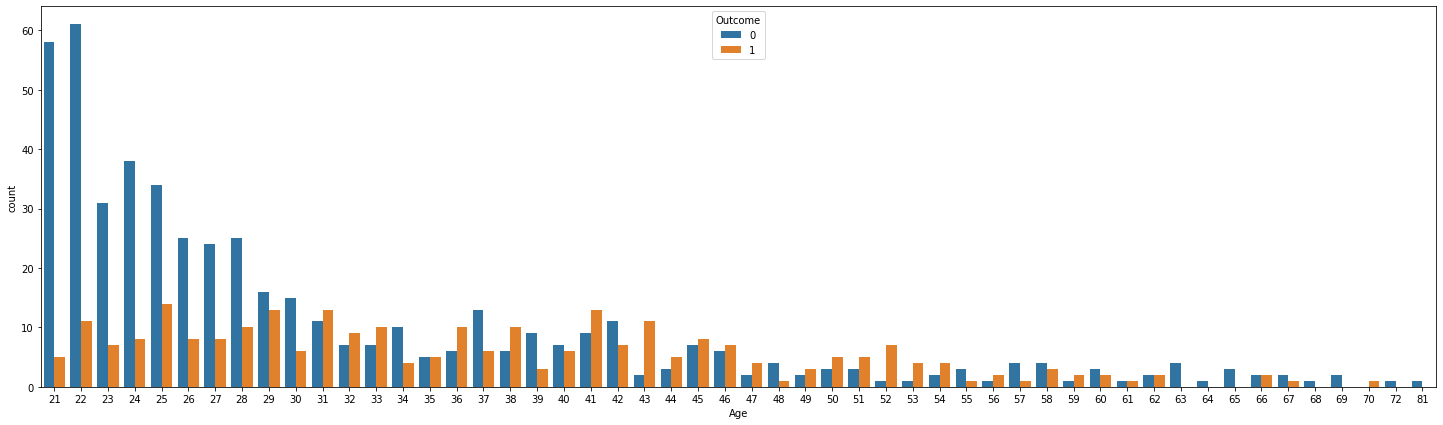

In [8]:
plt.figure(figsize=(25,7))   #creates a new figure with (width,height) in inches
#Plotting the counts of observations in each categorical bin using bars
sns.countplot(x='Age',hue='Outcome',data=data) 

In [9]:
# splitting dataset into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=0)
print(X_train.shape)  #printing the shape of X_train  
print(y_train.shape)  #printing the shape of y_train
print(X_test.shape)   #printing the shape of X_test
print(y_test.shape)   #printing the shape of y_test 

(614, 8)
(614,)
(154, 8)
(154,)


In [10]:
# feature scaling
scaler = StandardScaler()  #creating an object(scaler) of class StandardScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

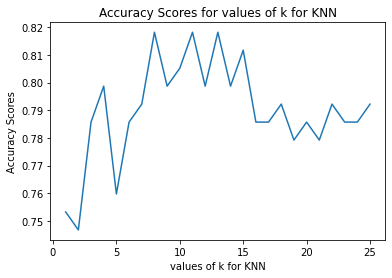

In [11]:
#experimenting with different values of k
k_range=list(range(1,26))
scores=[]
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors=k)  #loading model - KNN
    classifier.fit(X_train,y_train)                   #fitting model
    y_pred = classifier.predict(X_test)               #making predictions
    scores.append(accuracy_score(y_test,y_pred))      #calculating accuracy score

#Plotting accuracy scores for values of k for KNN
plt.plot(k_range,scores)
plt.xlabel("values of k for KNN")
plt.ylabel("Accuracy Scores")
plt.title("Accuracy Scores for values of k for KNN")
plt.show()

In [30]:
#Making a prediction for an example of an out-of-sample observation
k=int(input("Enter the value of k:"))
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train,y_train)
l=list(map(int,input("Enter elements of list of len 8 separated by ' ':").split()))
d=int(classifier.predict(scaler.transform([l])))
if d==1:
    print("The person is diabetic")
else:
    print("The person is not diabetic") 
print("The accuracy score for the model is ",scores[k-1])

The person is not diabetic
The accuracy score for the model is  0.7987012987012987
